# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
import requests
import os
url ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response.status_code

with open('image_predictions.tsv', mode ='wb') as file:
      file.write(response.content)

        
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [3]:
tweets_json = pd.read_json('tweet-json.txt', lines=True)
tweets_json.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### twitter_archive

In [4]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

We can see that tweet_id is an integer and timestamp is an object, they need to be changed.

Another note, the dog stage is in different four columns (doggo, floofer, pupper, puppo).

In [5]:
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
124,868639477480148993,NaN,NaN,2017-05-28 01:26:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to Cooper. His expres...,8.685523e+17,4.196984e+09,2017-05-27 19:39:34 +0000,"https://www.gofundme.com/3ti3nps,https://twitt...",12,10,Cooper,None,None,None,None
1251,710997087345876993,NaN,NaN,2016-03-19 01:11:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Milo and Amos. They are the best of pals....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710997087...,12,10,Milo,None,None,None,None
443,819347104292290561,NaN,NaN,2017-01-12 00:55:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Anna and Elsa. They fall asleep i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819347104...,12,10,Anna,None,None,None,None
414,822859134160621569,NaN,NaN,2017-01-21 17:31:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hobbes. He was told he was going to th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/822859134...,12,10,Hobbes,None,None,None,None
1977,672988786805112832,NaN,NaN,2015-12-05 04:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Schnozz. He's had a blurred tail since...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672988786...,10,10,Schnozz,None,None,pupper,None
1493,692752401762250755,NaN,NaN,2016-01-28 16:53:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Hello yes could I get one pupper to go please...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/692752401...,13,10,None,None,None,pupper,None
119,869772420881756160,NaN,NaN,2017-05-31 04:27:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dewey (pronounced ""covfefe""). He's hav...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/869772420...,13,10,Dewey,None,None,None,None
1295,707983188426153984,7.079801e+17,2.319108e+09,2016-03-10 17:35:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@serial @MrRoles OH MY GOD I listened to all o...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
2306,666835007768551424,NaN,NaN,2015-11-18 04:27:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",These are Peruvian Feldspars. Their names are ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666835007...,10,10,None,None,None,None,None
300,836753516572119041,NaN,NaN,2017-03-01 01:42:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Meera. She just heard about taxes and ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836753516...,12,10,Meera,doggo,None,None,None


In [6]:
twitter_archive.name.sample(20)

171            Winston
1413              None
562             Bailey
1775             Reese
1144              None
2195            Amélie
764             Gerald
458               None
945               None
1481             Sadie
453            Chelsea
2074              None
1741               Evy
919               None
1382                 a
2023              Lola
1219          Benedict
75              Shadow
196             Marlee
1214    Michelangelope
Name: name, dtype: object

There are rows with incorrect names in it in the 'name' column (such, a, an, the, one) and I noticed that they are all lowercase.

In [7]:
# checking for retweets
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
twitter_archive.retweeted_status_id.sample(10)

1178             NaN
2228             NaN
1543             NaN
171     8.395493e+17
1703             NaN
200              NaN
1746             NaN
289     8.207497e+17
302     8.366481e+17
2017             NaN
Name: retweeted_status_id, dtype: float64

There are retweets. If the retweeted_status_id is NaN that mean it has no retweet. 

In [9]:
twitter_archive.duplicated().sum()

0

In [10]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

It has alot of missing data in 6 columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls)

### image_predictions

In [11]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
#checking for null values
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [13]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1270,749981277374128128,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False
900,699801817392291840,https://pbs.twimg.com/media/CbYyCMcWIAAHHjF.jpg,2,golden_retriever,0.808978,True,Irish_setter,0.042428,True,Labrador_retriever,0.023536,True
879,698549713696649216,https://pbs.twimg.com/media/CbG_QRJXEAALVWy.jpg,1,French_bulldog,0.998544,True,Boston_bull,0.001404,True,boxer,0.000023,True
1926,857746408056729600,https://pbs.twimg.com/media/C-dTzBzXUAQRjYz.jpg,1,Labrador_retriever,0.919832,True,beagle,0.043513,True,golden_retriever,0.023359,True
415,674014384960745472,https://pbs.twimg.com/media/CVqUgTIUAAUA8Jr.jpg,1,Pembroke,0.742320,True,Cardigan,0.084937,True,Eskimo_dog,0.068321,True
319,671768281401958400,https://pbs.twimg.com/media/CVKZsHtWwAA6gPj.jpg,2,Chihuahua,0.500373,True,French_bulldog,0.112796,True,Italian_greyhound,0.062893,True
1296,752173152931807232,https://pbs.twimg.com/media/CnBBfNuWcAAkOgO.jpg,1,Labrador_retriever,0.527659,True,German_shepherd,0.174765,True,Chihuahua,0.045525,True
1301,752682090207055872,https://pbs.twimg.com/media/CnIQXdYWgAAnsZZ.jpg,2,German_shepherd,0.299966,True,Eskimo_dog,0.278355,True,Siberian_husky,0.178520,True
1290,751456908746354688,https://pbs.twimg.com/ext_tw_video_thumb/75145...,1,golden_retriever,0.714409,True,Afghan_hound,0.066163,True,chow,0.028413,True
1882,847157206088847362,https://pbs.twimg.com/media/C8G0_CMWsAAjjAY.jpg,2,Staffordshire_bullterrier,0.219609,True,American_Staffordshire_terrier,0.178671,True,pug,0.123271,True


In [14]:
image_predictions.jpg_url.duplicated().sum()

66

There are duplicated urls.

In [15]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


tweet_id is an integer, need to be changed to a string.

In [16]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### tweets_json

In [17]:
tweets_json.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [18]:
tweets_json.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated',
       'user'],
      dtype='object')

In [19]:
tweets_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

id column need to be renamed so we can merge later the 3 DataFrames, and it is an integer should be changed to a string.

These columns (in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str) are floats need to be changed also.

Also the two columns (retweet_count and favorite_count) are integers need to be changed to floats.

In [20]:
tweets_json.isnull().sum()

contributors                     2354
coordinates                      2354
created_at                          0
display_text_range                  0
entities                            0
extended_entities                 281
favorite_count                      0
favorited                           0
full_text                           0
geo                              2354
id                                  0
id_str                              0
in_reply_to_screen_name          2276
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
is_quote_status                     0
lang                                0
place                            2353
possibly_sensitive                143
possibly_sensitive_appealable     143
quoted_status                    2326
quoted_status_id                 2325
quoted_status_id_str             2325
retweet_count                       0
retweeted   

There are alot of null values.

# Issues

### Quality issues



1.tweet_id  in twitter_archive & image_predictions, and id column in tweets_json, are an intgers.

#### twitter_archive
2.timestamp is an object.

3.name mistake (such, an, a, the) which is not a name.

4.the dataset has retweets.

5.alot of missing data, in 6 columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls).

#### image_predictions
6.there are 66 duplicated urls.

#### tweets_json
7.These columns (in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str) are floats. And these two columns (retweet_count and favorite_count) are integers.

8.there are null values in some columns, and other columns with NaN in all rows. 16 columns.



### Tidiness issues

1.the dog "stage" in twitter_archive (doggo, floofer, pupper, and puppo) are in 4 columns.

2.rename id column to tweet_id, like the other two DataFrames, so we can merge later.

3.merge all 3 DataFrames into 1 DataFrame.


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [21]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweets_json_clean = tweets_json.copy()

### Issue #1:

#### Define:

Convert tweet_id in twitter_archive & image_predictions, and id column in tweets_json, to a string.

#### Code

In [22]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].apply(str)
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].apply(str)
tweets_json_clean['id'] = tweets_json_clean['id'].apply(str)

#### Test

In [23]:
print (twitter_archive_clean.dtypes)

tweet_id                       object
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object


In [24]:
print (image_predictions_clean.dtypes)

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object


In [25]:
print (tweets_json_clean.dtypes)

contributors                            float64
coordinates                             float64
created_at                       datetime64[ns]
display_text_range                       object
entities                                 object
extended_entities                        object
favorite_count                            int64
favorited                                  bool
full_text                                object
geo                                     float64
id                                       object
id_str                                    int64
in_reply_to_screen_name                  object
in_reply_to_status_id                   float64
in_reply_to_status_id_str               float64
in_reply_to_user_id                     float64
in_reply_to_user_id_str                 float64
is_quote_status                            bool
lang                                     object
place                                    object
possibly_sensitive                      

### Issue #2:

#### Define

Convert timestamp to datetime in twitter_archive_clean.

#### Code

In [26]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test

In [27]:
print (twitter_archive_clean.dtypes)

tweet_id                              object
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object


### Issue #3:

#### Define:

Change all name mistakes in twitter_archive_clean "such, an, a, the" (which are lowercase) to None.

#### Code

In [28]:
twitter_archive_clean.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
Oliver       11
Penny        10
Tucker       10
Lola         10
Winston       9
Bo            9
Sadie         8
the           8
an            7
Toby          7
Buddy         7
Daisy         7
Bailey        7
Bella         6
Milo          6
Oscar         6
Jack          6
Stanley       6
Scout         6
Leo           6
Rusty         6
Koda          6
Dave          6
Jax           6
very          5
           ... 
Karma         1
Maisey        1
my            1
Dewey         1
Geoff         1
Arnold        1
Maks          1
Bruiser       1
Aubie         1
Shelby        1
Zuzu          1
Trip          1
Anna          1
this          1
Bronte        1
Snickers      1
Skittles      1
Jareld        1
Herb          1
Simba         1
Creg          1
Kevon         1
Nimbus        1
Tango         1
Mojo          1
Lugan         1
Sephie        1
Jessifer      1
Spencer       1
Augie         1
Name: name, Length: 957,

In [29]:
twitter_archive_clean.name = twitter_archive_clean.name.str.replace('^[a-z]+', 'None')

#### Test


In [30]:
twitter_archive_clean.name.value_counts()

None         854
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Lola          10
Tucker        10
Penny         10
Bo             9
Winston        9
Sadie          8
Toby           7
Bailey         7
Daisy          7
Buddy          7
Jack           6
Bella          6
Leo            6
Jax            6
Stanley        6
Koda           6
Scout          6
Dave           6
Milo           6
Rusty          6
Oscar          6
George         5
Chester        5
Gus            5
Louis          5
            ... 
Fido           1
Buddah         1
Shnuggles      1
Stella         1
Jaycob         1
Ozzie          1
Staniel        1
Tiger          1
Tove           1
Josep          1
Tommy          1
Cal            1
Hamrick        1
Jonah          1
Jed            1
Barney         1
Mairi          1
Flash          1
Scruffers      1
Rose           1
Trigger        1
Link           1
Tassy          1
Pancake        1
Lolo           1
Odin           1
Colin          1
Ferg          

### Issue #4:

#### Define:

This dataset has retweets so I will remove all rows with retweets and keep all rows with NaN, in retweeted_status_id.

#### Code

In [31]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

#### Test


In [32]:
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [33]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), fl

### Issue #5:

#### Define:

Drop these columns in twitter_archive_clean (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id, expanded_urls) as it has alot of missing data and I don't think I will need them for the analysis.

#### Code

In [34]:
twitter_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id', 'expanded_urls'], axis=1, inplace=True)

#### Test


In [35]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


In [36]:
twitter_archive_clean.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

### Issue #6:

#### Define:

Drop the 66 duplicated urls in image_predictions_clean.

#### Code

In [37]:
image_predictions_clean.drop_duplicates('jpg_url', inplace=True)

#### Test


In [38]:
image_predictions_clean.jpg_url.duplicated().sum()

0

### Issue #7:

#### Define:

These columns (in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str) are floats need to be changed to objects. Also these two columns (retweet_count and favorite_count) are integers need to be changed to floats.

#### Code

In [46]:
tweets_json_clean['in_reply_to_status_id'] = tweets_json_clean['in_reply_to_status_id'].apply(str)
tweets_json_clean['in_reply_to_status_id_str'] = tweets_json_clean['in_reply_to_status_id_str'].apply(str)
tweets_json_clean['in_reply_to_user_id'] = tweets_json_clean['in_reply_to_user_id'].apply(str)
tweets_json_clean['in_reply_to_user_id_str'] = tweets_json_clean['in_reply_to_user_id_str'].apply(str)
tweets_json_clean['retweet_count'] = tweets_json_clean['retweet_count'].apply(float)
tweets_json_clean['favorite_count'] = tweets_json_clean['favorite_count'].apply(float)

#### Test

In [47]:
print (tweets_json_clean.dtypes)

contributors                            float64
coordinates                             float64
created_at                       datetime64[ns]
display_text_range                       object
entities                                 object
extended_entities                        object
favorite_count                          float64
favorited                                  bool
full_text                                object
geo                                     float64
id                                       object
id_str                                    int64
in_reply_to_screen_name                  object
in_reply_to_status_id                    object
in_reply_to_status_id_str                object
in_reply_to_user_id                      object
in_reply_to_user_id_str                  object
is_quote_status                            bool
lang                                     object
place                                    object
possibly_sensitive                      

### Issue #8:

#### Define:

Drop null values in tweets_json_clean.

#### Code

In [48]:
tweets_json_clean.dropna(how='any', axis=1, inplace=True)

#### Test


In [49]:
tweets_json_clean.isnull().sum()

created_at                   0
display_text_range           0
entities                     0
favorite_count               0
favorited                    0
full_text                    0
id                           0
id_str                       0
in_reply_to_status_id        0
in_reply_to_status_id_str    0
in_reply_to_user_id          0
in_reply_to_user_id_str      0
is_quote_status              0
lang                         0
retweet_count                0
retweeted                    0
source                       0
truncated                    0
user                         0
dtype: int64

### Issue #9:

#### Define:

Create the dog_stage in twitter_archive_clean, and then put (doggo, floofer, pupper, and puppo) as values in it.

#### Code

In [50]:
twitter_archive_clean['dog_stage'] = twitter_archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [51]:
twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test


In [52]:
twitter_archive_clean.dog_stage.value_counts()

pupper     244
doggo       84
puppo       32
floofer      4
Name: dog_stage, dtype: int64

In [53]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

In [54]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN


### Issue #10:

#### Define:

Rename id in 'tweets_json_clean' column to tweet_id, like the other two DataFrames, so we can merge later.

#### Code

In [55]:
tweets_json_clean.rename(columns={"id":"tweet_id"}, inplace=True)

#### Test

In [56]:
tweets_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 19 columns):
created_at                   2354 non-null datetime64[ns]
display_text_range           2354 non-null object
entities                     2354 non-null object
favorite_count               2354 non-null float64
favorited                    2354 non-null bool
full_text                    2354 non-null object
tweet_id                     2354 non-null object
id_str                       2354 non-null int64
in_reply_to_status_id        2354 non-null object
in_reply_to_status_id_str    2354 non-null object
in_reply_to_user_id          2354 non-null object
in_reply_to_user_id_str      2354 non-null object
is_quote_status              2354 non-null bool
lang                         2354 non-null object
retweet_count                2354 non-null float64
retweeted                    2354 non-null bool
source                       2354 non-null object
truncated                    2354 non-nu

### Issue #11:

#### Define:

Merge all 3 DataFrames into 1 DataFrame

#### Code

In [57]:
df1 = pd.merge(twitter_archive_clean, image_predictions_clean, how='left', on='tweet_id')
df_master = pd.merge(df1, tweets_json_clean, how='left', on='tweet_id')

#### Test

In [58]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 37 columns):
tweet_id                     2175 non-null object
timestamp                    2175 non-null datetime64[ns]
source_x                     2175 non-null object
text                         2175 non-null object
rating_numerator             2175 non-null int64
rating_denominator           2175 non-null int64
name                         2175 non-null object
dog_stage                    364 non-null object
jpg_url                      1994 non-null object
img_num                      1994 non-null float64
p1                           1994 non-null object
p1_conf                      1994 non-null float64
p1_dog                       1994 non-null object
p2                           1994 non-null object
p2_conf                      1994 non-null float64
p2_dog                       1994 non-null object
p3                           1994 non-null object
p3_conf                      1994 n

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [59]:
df_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [60]:
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import datetime 

### Insights:
1. Does the number of tweets increase or decrease over time?

2. What is the most popular dog stage?

3. Which dog stage has the most total retweets?

### Visualization

##### 1- Does the number of tweets increase or decrease over time?

In [61]:
df_master['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index()

2015-11    300
2015-12    388
2016-01    194
2016-02    125
2016-03    136
2016-04     60
2016-05     60
2016-06     94
2016-07     97
2016-08     63
2016-09     69
2016-10     73
2016-11     58
2016-12     59
2017-01     71
2017-02     72
2017-03     57
2017-04     49
2017-05     45
2017-06     50
2017-07     53
2017-08      2
Name: timestamp, dtype: int64

In [62]:
tweets = df_master['tweet_id'].groupby([df_master['timestamp'].dt.year, df_master['timestamp'].dt.month]).count()

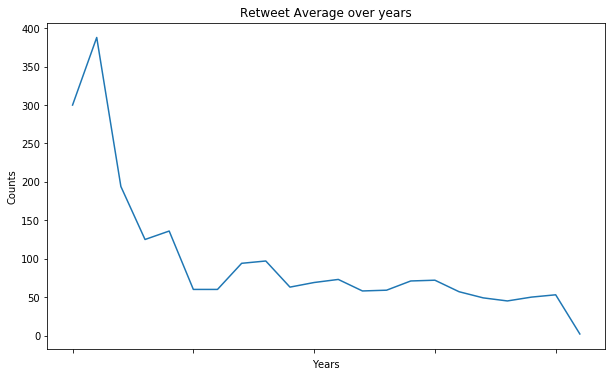

In [63]:
tweets.plot('line', figsize=(10, 6));
plt.title('Retweet Average over years');
plt.xlabel('Years');
plt.ylabel('Counts');

##### 2- What is the most popular dog stage?

In [64]:
df_master.dog_stage.value_counts()

pupper     244
doggo       84
puppo       32
floofer      4
Name: dog_stage, dtype: int64

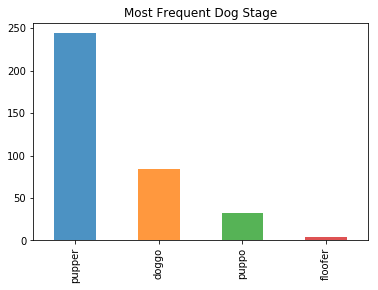

In [65]:
df_master.dog_stage.value_counts().plot(kind='bar', title='Most Frequent Dog Stage', alpha=.8);

Pupper is the most popular dog stage.

##### 3- Which dog stage has the most total retweets?

In [66]:
# I have to keep the four stages without any null
stages = ['pupper', 'doggo', 'puppo', 'floofer']
df_new = df_master[df_master['dog_stage'].isin(stages)]

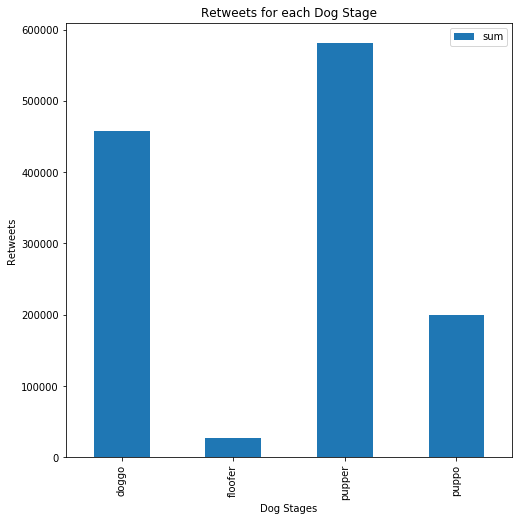

In [67]:
total_retweets = df_new.groupby('dog_stage').retweet_count.agg(['sum'])
total_retweets.plot(kind='bar', figsize=(8, 8))
plt.xlabel('Dog Stages')
plt.ylabel('Retweets')
plt.title('Retweets for each Dog Stage');

Pupper has the highest total retweets.